## 1.Environment Setup

In [2]:
import os
import json
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, MinMaxScaler

# Đặt seed để đảm bảo nhất quán giữa các lần chạy
# os.environ["PYTHONHASHSEED"] = "42"
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
print("Seed = ", RANDOM_SEED)

Seed =  42


## 2.Data Processing

In [5]:
# cleveland.csv
# https://drive.google.com/file/d/16HPyuXWXPptt5g3xvS_kR_wXAfjpR1Ju/view?usp=sharing
!gdown 16HPyuXWXPptt5g3xvS_kR_wXAfjpR1Ju

Downloading...
From: https://drive.google.com/uc?id=16HPyuXWXPptt5g3xvS_kR_wXAfjpR1Ju
To: /home/banhmuy/data-science-artificial-intelligence-projects/Heart-Disease-Diagnosis/notebooks/cleveland.csv
100%|██████████████████████████████████████| 10.9k/10.9k [00:00<00:00, 6.78MB/s]


In [6]:
# Full dataaset
!mv cleveland.csv ../data/

### Processing

In [3]:
DATA_PATH = '../data/cleveland.csv'
COLUMNS = ['age','sex','cp','trestbps','chol','fbs','restecg',
           'thalach','exang','oldpeak','slope','ca','thal','target']

raw = pd.read_csv(DATA_PATH, header=None)
raw.columns = COLUMNS

raw.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
# convert columns to numeric, coerce errors to NaN
for c in ['age','trestbps','chol','thalach','oldpeak','ca','thal']:
    raw[c] = pd.to_numeric(raw[c], errors='coerce')

raw['target'] = (raw['target'] > 0).astype(int)
print("Shape:", raw.shape)
display(raw.head())
display(raw.isna().sum())

Shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

### Statistic

In [5]:
# basic statistic
display(raw.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


### Plotting data

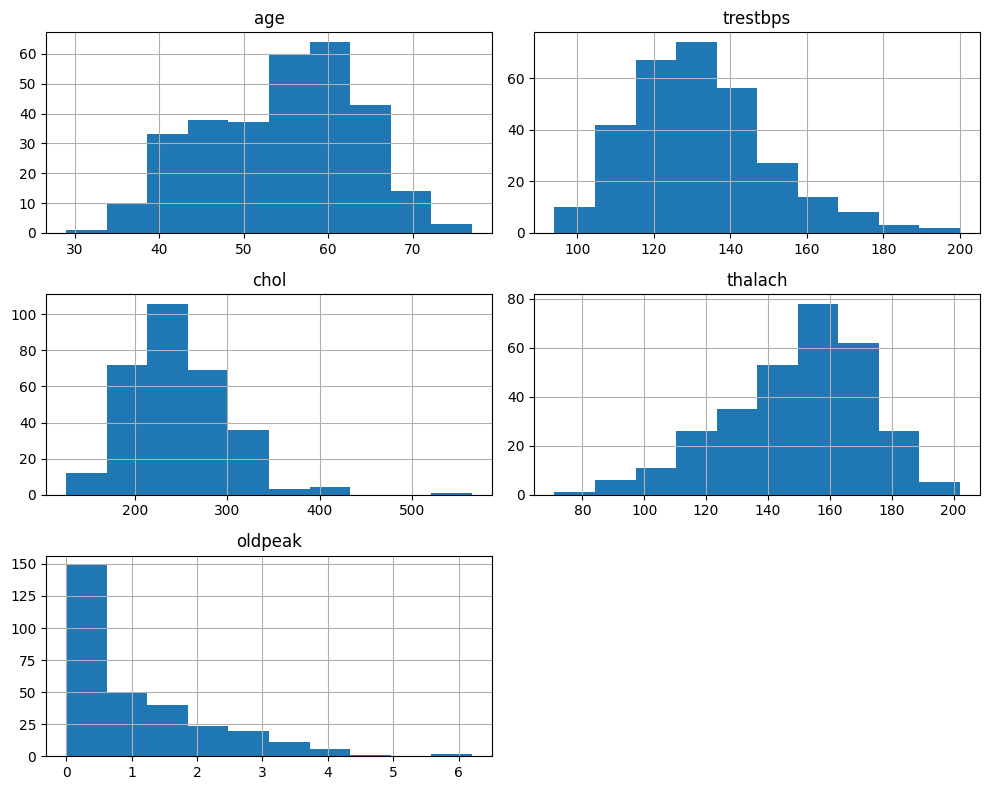

In [ ]:
# Define numerical, categorical columns before plotting
numeric_cols = ['age','trestbps','chol','thalach','oldpeak']
categorical_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

# Plot histograms for numerical columns
raw[numeric_cols].hist(figsize=(10, 8), bins=10)
plt.tight_layout() #Adjusts the spacing between sub-charts
plt.show()


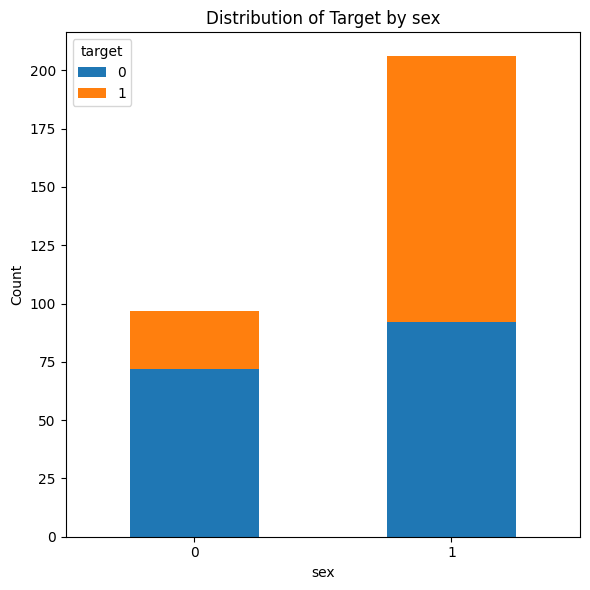

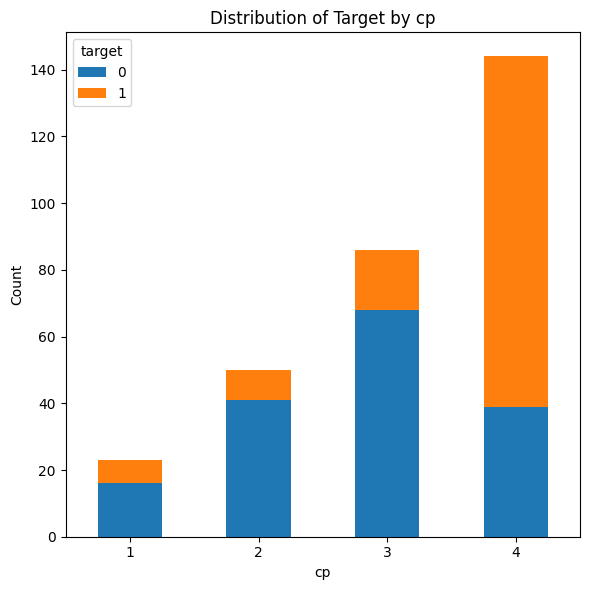

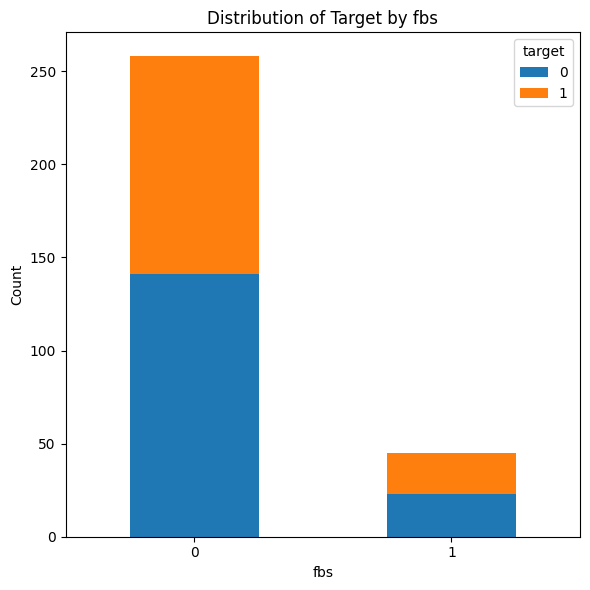

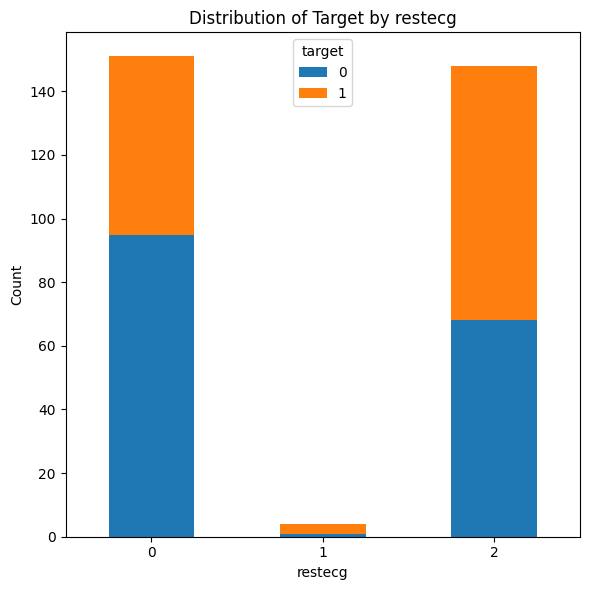

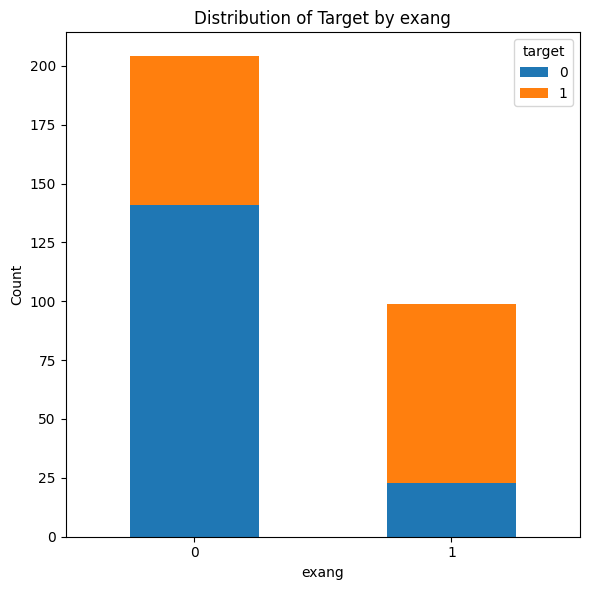

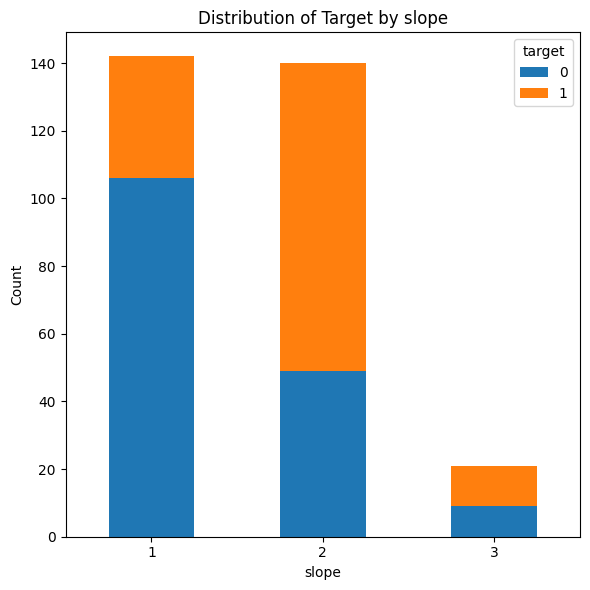

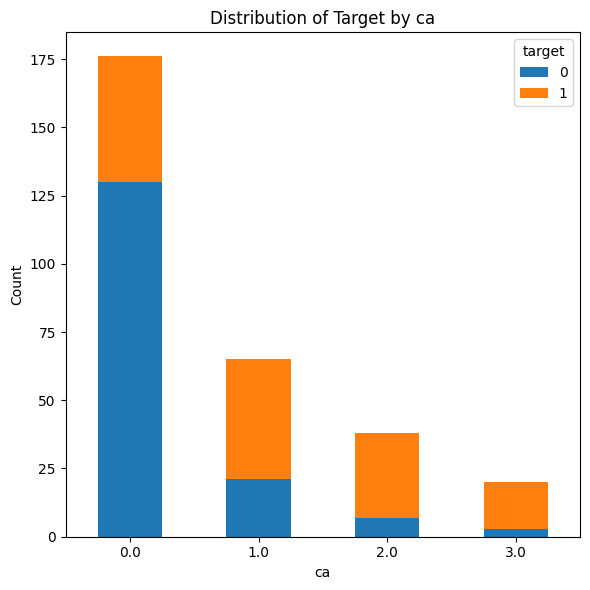

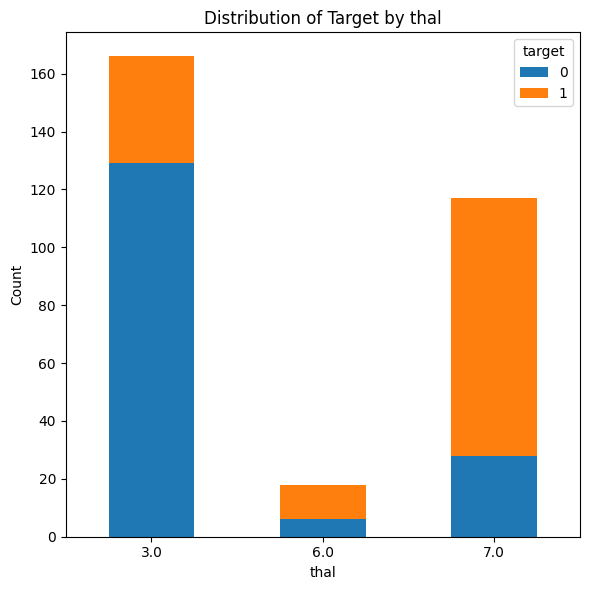

In [ ]:
# Plot count plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 6))
    raw.groupby([col, 'target']).size().unstack().plot(
        kind='bar',        # bar chart
        stacked=True,      # Stack the bars (shows how 'target' is split within each category).
        ax=plt.gca()       # Plot the chart onto the current figure.
    )
    plt.title(f'Distribution of Target by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0) # X-axis labels horizontal for easy reading.
    plt.tight_layout()
    plt.show()

## 3.Visual Explorations

### 

## 4.Data Post-processing

🤔**What is data post-processing?**


### 4.1 Raw Dataset

### 4.2 Feature Engineering Dataset

In [ ]:
# zip folder
!zip -r dataset.zip splits